# Linear Regression/LogisticRegression more Features

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn import neighbors
import warnings
warnings.filterwarnings('ignore')

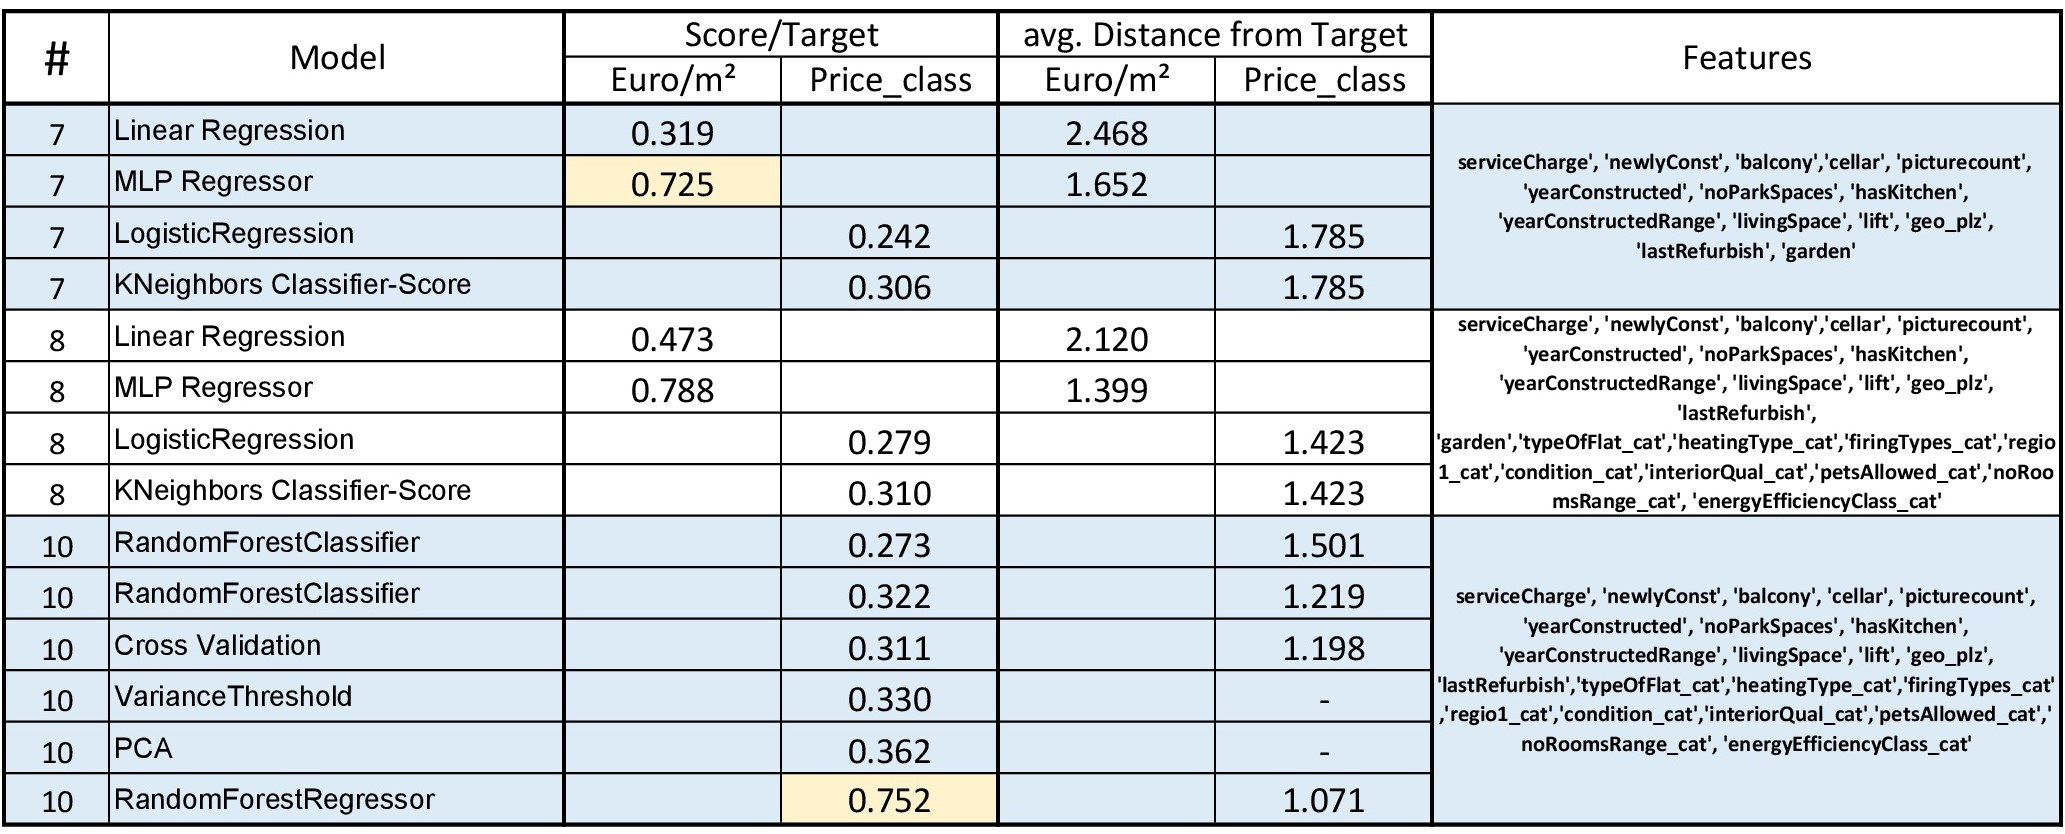

# same process but with additional features made in Notbook 07

In [2]:
# load data set
immo = pd.read_csv('immo_cat.csv')

In [3]:
pd.set_option('display.max_columns', None)
immo.head(1)

,Unnamed: 0.1,Unnamed: 0,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date,Euro/m2,price_class,typeOfFlat_cat,heatingType_cat,firingTypes_cat,regio1_cat,condition_cat,interiorQual_cat,petsAllowed_cat,noRoomsRange_cat,energyEfficiencyClass_cat
0,0,0,Nordrhein_Westfalen,245.0,central_heating,ONE_YEAR_FREE,0.0,0,0,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,0,Nordrhein_Westfalen,1,2.0,595.0,244,86.0,Dortmund,well_kept,normal,unknown,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,0,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,1,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,77.111,unknown,2009.1,89.11,0.21111,May19,6.92,4,0.4,0.55,0.45,0.51,0.57,0.3,0.95,4.0,0.61


In [4]:
immo.head(1)

,Unnamed: 0.1,Unnamed: 0,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date,Euro/m2,price_class,typeOfFlat_cat,heatingType_cat,firingTypes_cat,regio1_cat,condition_cat,interiorQual_cat,petsAllowed_cat,noRoomsRange_cat,energyEfficiencyClass_cat
0,0,0,Nordrhein_Westfalen,245.0,central_heating,ONE_YEAR_FREE,0.0,0,0,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,0,Nordrhein_Westfalen,1,2.0,595.0,244,86.0,Dortmund,well_kept,normal,unknown,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,0,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,1,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,77.111,unknown,2009.1,89.11,0.21111,May19,6.92,4,0.4,0.55,0.45,0.51,0.57,0.3,0.95,4.0,0.61


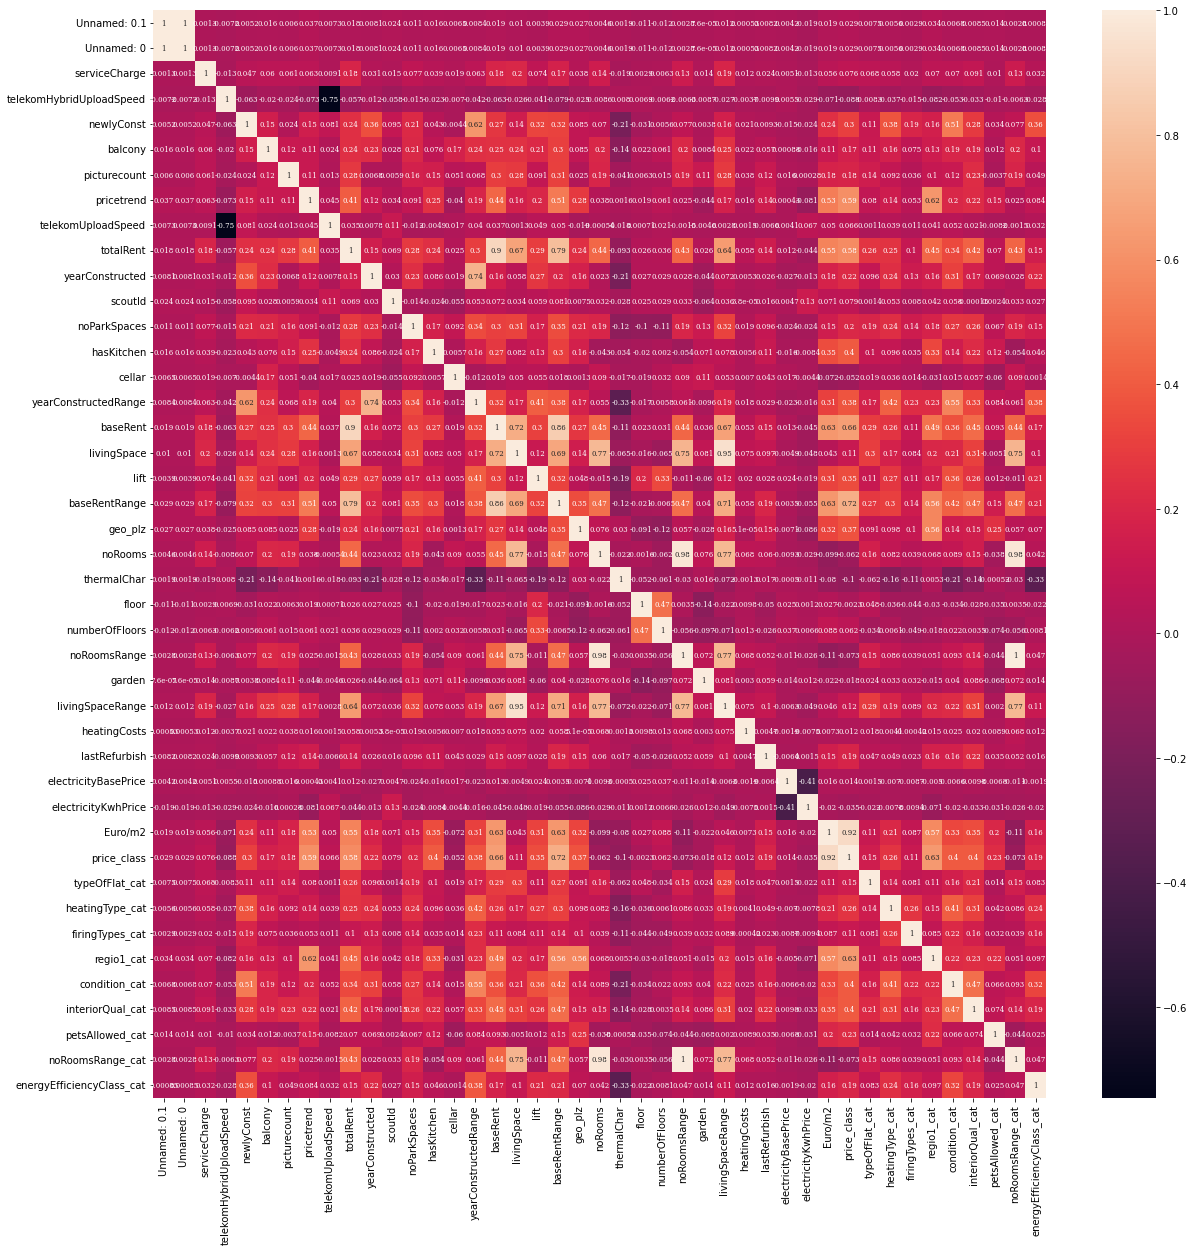

In [5]:
correlations_matrix = immo.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(correlations_matrix, annot=True, annot_kws={
                'fontsize': 7,
                'fontfamily': 'serif'
            })
plt.show()

### Feature selection

In [6]:
x = immo[['serviceCharge', 'newlyConst', 'balcony','cellar', 'picturecount', 'yearConstructed', 'noParkSpaces', 'hasKitchen', 'yearConstructedRange', 'livingSpace', 'lift', 'geo_plz', 'lastRefurbish', 'garden','typeOfFlat_cat','heatingType_cat','firingTypes_cat','regio1_cat','condition_cat','interiorQual_cat','petsAllowed_cat','noRoomsRange_cat', 'energyEfficiencyClass_cat']].copy()
x.head(5)

,serviceCharge,newlyConst,balcony,cellar,picturecount,yearConstructed,noParkSpaces,hasKitchen,yearConstructedRange,livingSpace,lift,geo_plz,lastRefurbish,garden,typeOfFlat_cat,heatingType_cat,firingTypes_cat,regio1_cat,condition_cat,interiorQual_cat,petsAllowed_cat,noRoomsRange_cat,energyEfficiencyClass_cat
0,245.00,0,0,1,6,1965.0,1.0,0,2.0,86.00,0,44269,2009.1,1,0.4,0.55,0.45,0.51,0.57,0.30,0.95,4.0,0.61
1,134.00,0,1,0,8,1871.0,2.0,0,1.0,89.00,0,67459,2019.0,0,0.4,0.55,0.45,0.58,0.52,0.30,1.00,3.0,0.61
2,255.00,1,1,1,8,2019.0,1.0,0,9.0,83.80,1,1097,2009.1,0,0.4,1.00,0.45,0.38,1.00,0.56,0.95,3.0,0.61
3,58.15,0,1,0,9,1964.0,0.0,0,2.0,58.15,0,9599,2009.1,0,0.4,0.55,0.45,0.38,0.61,0.37,0.95,3.0,0.61
4,138.00,0,1,0,19,1950.0,0.0,0,1.0,84.97,0,28213,2009.1,0,0.4,0.55,0.45,0.52,0.52,0.37,0.95,3.0,0.61


### Linear Regression target selection (Euro/m²)

In [7]:
y = immo[['Euro/m2']].copy()
y.head(5)

,Euro/m2
0,6.92
1,8.99
2,11.52
3,5.90
4,9.00


### Linear Regression train test split

In [8]:
train_X, test_X, train_Y, test_Y = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [9]:
print('train_X= ',train_X.shape)
print('test_X= ',test_X.shape)
print('train_Y= ',train_Y.shape)
print('test_Y= ',test_Y.shape)

train_X=  (214248, 23)
test_X=  (53562, 23)
train_Y=  (214248, 1)
test_Y=  (53562, 1)


In [10]:
# Scaling data
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

# Linear Regression

In [11]:
linreg=LinearRegression()    # model
linreg.fit(train_X, train_Y)   # model train
y_pred_linreg=linreg.predict(test_X)   # model prediction
print ('train R2: {} -- test R2: {}'.format(linreg.score(train_X, train_Y),
                                            linreg.score(test_X, test_Y)))

# mean squared error
train_mse=mse(linreg.predict(train_X), train_Y)
test_mse=mse(linreg.predict(test_X), test_Y)
print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

#mean_absolute_error
train_mae=mae(linreg.predict(train_X), train_Y)
test_mae=mae(linreg.predict(test_X), test_Y)

print ('train MAE: {} -- test MAE: {}'.format(train_mse, test_mse))

def normalize(X):         # normalization function
    X_mean=X.mean(axis=0)
    X_std=X.std(axis=0)
    X_std[X_std==0]=1.0
    X=(X-X_mean)/X_std
    return X

train R2: 0.48120782384389216 -- test R2: 0.47333981677181824
train MSE: 11.160160826813474 -- test MSE: 11.461783443001938
train RMSE: 3.3406826887349648 -- test RMSE: 3.385525578547877
train MAE: 11.160160826813474 -- test MAE: 11.461783443001938


### MLP Regressor

In [12]:
# Fitting and training the model
mlp = MLPRegressor(hidden_layer_sizes=(50, 50))
mlp.fit(train_X, train_Y)

# Predictions on TEST data and score
mlp_test_predictions = mlp.predict(test_X)
mlp_test_score = r2_score(test_Y,mlp_test_predictions)
print("mlp_test_score is: ", mlp_test_score)

mlp_test_score is:  0.7888228847059584


#### Distance (Linear Regression)
-->calculates the average distance (difference) between target (base rent [Euro]/living space[m]) and prediction (in [Euro/m²])

In [13]:
dist1=pd.concat([test_Y], axis=1)
dist1['predicted'] = y_pred_linreg
dist1['difference'] = round(((dist1['Euro/m2']-dist1['predicted'])**2)**(1/2),2)

In [14]:
dist1

,Euro/m2,predicted,difference
204337,4.92,4.783321,0.14
215731,6.42,9.850341,3.43
168163,11.02,12.680755,1.66
64568,4.58,6.054827,1.47
267465,6.00,4.950855,1.05
...,...,...,...
90274,8.67,9.051471,0.38
1498,6.25,8.005044,1.76
5525,5.20,5.562835,0.36
54995,5.06,6.335563,1.28


In [15]:
dist1['difference'].mean()

2.1206392591762695

#### Distance (MLP)

In [16]:
dist2=pd.concat([test_Y], axis=1)
dist2['predicted'] = mlp_test_predictions
dist2['difference'] = round(((dist2['Euro/m2']-dist2['predicted'])**2)**(1/2),2)

In [17]:
dist2

,Euro/m2,predicted,difference
204337,4.92,5.017209,0.10
215731,6.42,9.799191,3.38
168163,11.02,12.624650,1.60
64568,4.58,5.369611,0.79
267465,6.00,6.892898,0.89
...,...,...,...
90274,8.67,9.105452,0.44
1498,6.25,6.271243,0.02
5525,5.20,5.580719,0.38
54995,5.06,4.600394,0.46


In [18]:
dist2['difference'].mean()

1.3993627945184994

# Multi-class classification & Classification model

In [19]:
# Target (y) and Feature selection (X)
y = immo[['price_class']].copy()
X = immo[['serviceCharge', 'newlyConst', 'balcony','cellar', 'picturecount', 'yearConstructed', 'noParkSpaces', 'hasKitchen', 'yearConstructedRange', 'livingSpace', 'lift', 'geo_plz', 'lastRefurbish', 'garden','typeOfFlat_cat','heatingType_cat','firingTypes_cat','regio1_cat','condition_cat','interiorQual_cat','petsAllowed_cat','noRoomsRange_cat','typeOfFlat_cat','heatingType_cat','firingTypes_cat','regio1_cat','condition_cat','interiorQual_cat','petsAllowed_cat','noRoomsRange_cat', 'energyEfficiencyClass_cat']].copy()
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.head(1)

,serviceCharge,newlyConst,balcony,cellar,picturecount,yearConstructed,noParkSpaces,hasKitchen,yearConstructedRange,livingSpace,lift,geo_plz,lastRefurbish,garden,typeOfFlat_cat,heatingType_cat,firingTypes_cat,regio1_cat,condition_cat,interiorQual_cat,petsAllowed_cat,noRoomsRange_cat,typeOfFlat_cat,heatingType_cat,firingTypes_cat,regio1_cat,condition_cat,interiorQual_cat,petsAllowed_cat,noRoomsRange_cat,energyEfficiencyClass_cat
50850,100.0,0,1,1,14,1895.0,0.0,1,1.0,79.0,0,99086,2009.1,0,0.4,0.55,0.45,0.33,0.57,0.37,0.92,2.0,0.4,0.55,0.45,0.33,0.57,0.37,0.92,2.0,0.51


In [21]:
y_train.head(1)

,price_class
50850,5


In [22]:
X_train_num = X_train[['serviceCharge','picturecount','yearConstructed','noParkSpaces','yearConstructedRange',
                       'livingSpace','geo_plz','lastRefurbish','typeOfFlat_cat','heatingType_cat','firingTypes_cat','regio1_cat','condition_cat','interiorQual_cat','petsAllowed_cat','noRoomsRange_cat', 'energyEfficiencyClass_cat']]
X_train_cat = X_train[['newlyConst','balcony','hasKitchen','lift', 'garden','cellar']]

In [23]:
# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized)

In [24]:
X_train_norm.columns = X_train_num.columns
X_train_norm.head()

,serviceCharge,picturecount,yearConstructed,noParkSpaces,yearConstructedRange,livingSpace,geo_plz,lastRefurbish,typeOfFlat_cat,typeOfFlat_cat,heatingType_cat,heatingType_cat,firingTypes_cat,firingTypes_cat,regio1_cat,regio1_cat,condition_cat,condition_cat,interiorQual_cat,interiorQual_cat,petsAllowed_cat,petsAllowed_cat,noRoomsRange_cat,noRoomsRange_cat,energyEfficiencyClass_cat
0,0.000684,0.115702,0.876592,0.00,0.000,0.110764,0.990801,0.842029,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.028986,0.028986,0.203704,0.203704,0.136986,0.136986,0.2,0.2,0.25,0.25,0.000000
1,0.000845,0.008264,0.944172,0.00,0.125,0.064290,0.075011,0.842029,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.101449,0.101449,0.259259,0.259259,0.041096,0.041096,0.0,0.0,0.25,0.25,0.204082
2,0.001369,0.115702,0.998041,0.25,1.000,0.135725,0.862657,0.842029,0.0,0.0,0.555556,0.555556,0.454545,0.454545,0.797101,0.797101,1.000000,1.000000,0.397260,0.397260,0.0,0.0,0.50,0.50,0.204082
3,0.001027,0.074380,0.998041,0.25,1.000,0.095944,0.654671,0.842029,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.739130,0.739130,1.000000,1.000000,0.397260,0.397260,0.5,0.5,0.50,0.50,0.204082
4,0.001164,0.008264,0.993144,0.00,0.875,0.075959,0.173512,0.842029,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.057971,0.057971,0.277778,0.277778,0.397260,0.397260,0.0,0.0,0.25,0.25,0.489796


In [25]:
X_train_cat = pd.get_dummies(X_train_cat, columns=['newlyConst','balcony','hasKitchen','lift', 'garden','cellar'],drop_first=True)
X_train_cat.head()

,newlyConst_1,balcony_1,hasKitchen_1,lift_1,garden_1,cellar_1
50850,0,1,1,0,0,1
17253,0,1,0,0,0,1
217025,1,1,0,0,0,0
151326,1,1,0,1,0,1
177498,0,0,0,0,0,0


In [26]:
# encoding data
encoder = OneHotEncoder(drop='first').fit(X_train_cat) 

cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
X_train_cat_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)
display(X_train_cat_encode.head())
X_train_cat_encode.shape

,newlyConst_1_1,balcony_1_1,hasKitchen_1_1,lift_1_1,garden_1_1,cellar_1_1
0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0


(214248, 6)

In [27]:
X_train_transformed = pd.concat([X_train_norm, X_train_cat_encode], axis=1)
X_train_transformed

,serviceCharge,picturecount,yearConstructed,noParkSpaces,yearConstructedRange,livingSpace,geo_plz,lastRefurbish,typeOfFlat_cat,typeOfFlat_cat,heatingType_cat,heatingType_cat,firingTypes_cat,firingTypes_cat,regio1_cat,regio1_cat,condition_cat,condition_cat,interiorQual_cat,interiorQual_cat,petsAllowed_cat,petsAllowed_cat,noRoomsRange_cat,noRoomsRange_cat,energyEfficiencyClass_cat,newlyConst_1_1,balcony_1_1,hasKitchen_1_1,lift_1_1,garden_1_1,cellar_1_1
0,0.000684,0.115702,0.876592,0.00,0.0000,0.110764,0.990801,0.842029,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.028986,0.028986,0.203704,0.203704,0.136986,0.136986,0.2,0.2,0.25,0.25,0.000000,0.0,1.0,1.0,0.0,0.0,1.0
1,0.000845,0.008264,0.944172,0.00,0.1250,0.064290,0.075011,0.842029,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.101449,0.101449,0.259259,0.259259,0.041096,0.041096,0.0,0.0,0.25,0.25,0.204082,0.0,1.0,0.0,0.0,0.0,1.0
2,0.001369,0.115702,0.998041,0.25,1.0000,0.135725,0.862657,0.842029,0.0,0.0,0.555556,0.555556,0.454545,0.454545,0.797101,0.797101,1.000000,1.000000,0.397260,0.397260,0.0,0.0,0.50,0.50,0.204082,1.0,1.0,0.0,0.0,0.0,0.0
3,0.001027,0.074380,0.998041,0.25,1.0000,0.095944,0.654671,0.842029,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.739130,0.739130,1.000000,1.000000,0.397260,0.397260,0.5,0.5,0.50,0.50,0.204082,1.0,1.0,0.0,1.0,0.0,1.0
4,0.001164,0.008264,0.993144,0.00,0.8750,0.075959,0.173512,0.842029,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.057971,0.057971,0.277778,0.277778,0.397260,0.397260,0.0,0.0,0.25,0.25,0.489796,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214243,0.001163,0.066116,0.953967,0.25,0.2500,0.159126,0.863232,0.855072,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.797101,0.797101,0.203704,0.203704,0.041096,0.041096,1.0,1.0,0.75,0.75,0.204082,0.0,0.0,0.0,0.0,0.0,0.0
214244,0.001779,0.066116,0.848188,0.25,0.0000,0.133385,0.610171,0.842029,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.739130,0.739130,0.277778,0.277778,0.041096,0.041096,0.5,0.5,0.50,0.50,0.081633,0.0,0.0,1.0,0.0,0.0,0.0
214245,0.001574,0.082645,0.997062,0.25,1.0000,0.133089,0.004609,0.842029,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.101449,0.101449,0.277778,0.277778,0.397260,0.397260,0.5,0.5,0.50,0.50,0.489796,1.0,1.0,0.0,1.0,0.0,1.0
214246,0.000602,0.024793,0.950049,0.00,0.1250,0.095367,0.219242,0.842029,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.277778,0.277778,0.136986,0.136986,0.5,0.5,0.50,0.50,0.061224,0.0,1.0,1.0,0.0,0.0,0.0


In [28]:
classification = LogisticRegression(random_state=42, solver='lbfgs',
                  multi_class='auto', max_iter=100).fit(X_train_transformed, y_train)

In [29]:
X_test_num = X_test[['serviceCharge','picturecount','yearConstructed','noParkSpaces','yearConstructedRange',
                       'livingSpace','geo_plz','lastRefurbish','typeOfFlat_cat','heatingType_cat','firingTypes_cat',
                     'regio1_cat','condition_cat','interiorQual_cat','petsAllowed_cat','noRoomsRange_cat', 'energyEfficiencyClass_cat']]
X_test_cat = X_test[['newlyConst','balcony','hasKitchen','lift', 'garden','cellar']]
# Scaling data
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized)

In [30]:
# encoding data
encoder = OneHotEncoder(drop='first').fit(X_train_cat) 

cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
X_test_cat_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)
display(X_test_cat_encode.head())
X_test_cat_encode.shape

,newlyConst_1_1,balcony_1_1,hasKitchen_1_1,lift_1_1,garden_1_1,cellar_1_1
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,1.0,0.0,1.0
2,0.0,1.0,1.0,1.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,1.0


(53562, 6)

In [31]:
X_test_norm.columns = X_test_num.columns
X_test_transformed = pd.concat([X_test_norm, X_test_cat_encode], axis=1)
X_test_transformed.head(5)

,serviceCharge,picturecount,yearConstructed,noParkSpaces,yearConstructedRange,livingSpace,geo_plz,lastRefurbish,typeOfFlat_cat,typeOfFlat_cat,heatingType_cat,heatingType_cat,firingTypes_cat,firingTypes_cat,regio1_cat,regio1_cat,condition_cat,condition_cat,interiorQual_cat,interiorQual_cat,petsAllowed_cat,petsAllowed_cat,noRoomsRange_cat,noRoomsRange_cat,energyEfficiencyClass_cat,newlyConst_1_1,balcony_1_1,hasKitchen_1_1,lift_1_1,garden_1_1,cellar_1_1
0,0.001054,0.132231,0.852106,0.0,0.0000,0.114353,0.037803,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.028986,0.028986,0.203704,0.203704,0.136986,0.136986,0.5,0.5,0.75,0.75,0.489796,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000205,0.082645,0.953085,0.0,0.3875,0.057722,0.019910,0.842029,0.0,0.0,0.0,0.0,0.0,0.0,0.101449,0.101449,0.259259,0.259259,0.397260,0.397260,0.5,0.5,0.25,0.25,0.204082,0.0,0.0,1.0,1.0,0.0,1.0
2,0.001369,0.165289,0.992165,0.0,0.8750,0.081622,0.205676,0.842029,0.0,0.0,0.0,0.0,0.0,0.0,0.289855,0.289855,1.000000,1.000000,0.397260,0.397260,0.0,0.0,0.25,0.25,0.204082,0.0,1.0,1.0,1.0,0.0,1.0
3,0.001232,0.057851,0.886386,0.0,0.0000,0.135725,0.077411,0.842029,0.0,0.0,0.0,0.0,0.0,0.0,0.101449,0.101449,0.277778,0.277778,0.041096,0.041096,0.5,0.5,0.50,0.50,0.020408,0.0,1.0,0.0,1.0,0.0,1.0
4,0.001122,0.107438,0.881489,0.0,0.0000,0.106084,0.009652,0.869565,0.0,0.0,0.0,0.0,0.0,0.0,0.101449,0.101449,0.203704,0.203704,0.041096,0.041096,0.0,0.0,0.50,0.50,0.020408,0.0,1.0,0.0,0.0,0.0,1.0


### Classification Score

In [32]:
predictions = classification.predict(X_test_transformed)
classification.score(X_test_transformed, y_test)

0.2796385497180837

### KNeighbors Classifier-Score

In [33]:
clf = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')
clf.fit(X_train_transformed, y_train)
predictions_clf = clf.predict(X_test_transformed)
clf.score(X_test_transformed, y_test)

0.3103879616145775

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Distance (Logistic Regression)

In [35]:
dist3=pd.concat([y_test], axis=1)
dist3['predicted'] = predictions
dist3['difference'] = round(((dist3['price_class']-dist3['predicted'])**2)**(1/2),2)

In [36]:
dist3

,price_class,predicted,difference
204337,2,2,0.0
215731,4,8,4.0
168163,8,8,0.0
64568,2,3,1.0
267465,3,3,0.0
...,...,...,...
90274,6,5,1.0
1498,4,5,1.0
5525,3,3,0.0
54995,3,3,0.0


In [37]:
dist3['difference'].mean()

1.4239572831485008

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Distance (KNeighbors)

In [39]:
dist4=pd.concat([y_test], axis=1)
dist4['predicted'] = predictions_clf
dist4['difference'] = round(((dist3['price_class']-dist3['predicted'])**2)**(1/2),2)

In [40]:
dist4

,price_class,predicted,difference
204337,2,3,0.0
215731,4,3,4.0
168163,8,9,0.0
64568,2,2,1.0
267465,3,2,0.0
...,...,...,...
90274,6,9,1.0
1498,4,5,1.0
5525,3,3,0.0
54995,3,2,0.0


In [41]:
dist4['difference'].mean()

1.4239572831485008